# **Тенденции продаж в период новогодних праздников**

## **Цель**

Выделить ключевые области потенциального роста и улучшений, как например, самые продаваемые продукты и категории, самый популярный день для покупок, средние расходы в разбивке по полу и тп для принятия решений и снижение рисков в будущем.


### **План**
1. Прежде чем приступать к анализу, нужно убедиться, что в данных нет ошибок или пропусков, данные соответствуют типам данных, без дубликатов.
2. Провести анализ для выявление закономерностей и выполнить визуализацию данных.
3. Сделать вывод, описывающий проделанную работу на основе предыдущих шагов.

#### **Шаг 1. Загрузим данные и изучим информацию**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

In [2]:
christmas_sales_df = pd.read_csv('data.csv', sep=';')

In [3]:
christmas_sales_df.head()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,ProductName,Category,Quantity,UnitPrice,TotalPrice,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag
0,1,12/24/2020,7:27:59,441,27,Other,City_15,NaN,True,106,Toys_Product,Toys,5,96.786255,483.931273,Credit Card,False,0.0,False,Standard,5.0,Snowy,NaN,5,False
1,2,11/18/2022,14:36:39,340,43,Male,City_13,NaN,True,816,Clothing_Product,Clothing,1,95.279579,95.279579,Credit Card,True,0.0,True,Express,3.0,Sunny,NaN,2,True
2,3,12/26/2019,20:23:50,31,25,Other,City_7,92.0,False,508,Clothing_Product,Clothing,2,52.371645,104.743291,Credit Card,False,0.0,False,NaN,NaN,Rainy,Christmas Market,4,False
3,4,11/13/2018,23:08:08,39,64,Male,City_20,100.0,False,710,Toys_Product,Toys,5,63.647293,318.236463,Debit Card,False,0.0,True,NaN,NaN,Rainy,NaN,1,True
4,5,12/13/2020,4:38:08,344,26,Other,City_10,90.0,False,687,Toys_Product,Toys,3,57.384041,172.152122,Cash,False,0.0,True,NaN,NaN,Sunny,Christmas Market,4,False


In [4]:
christmas_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   Time                  10000 non-null  object 
 3   CustomerID            10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Gender                10000 non-null  object 
 6   Location              10000 non-null  object 
 7   StoreID               4582 non-null   float64
 8   OnlineOrderFlag       10000 non-null  bool   
 9   ProductID             10000 non-null  int64  
 10  ProductName           10000 non-null  object 
 11  Category              10000 non-null  object 
 12  Quantity              10000 non-null  int64  
 13  UnitPrice             10000 non-null  float64
 14  TotalPrice            10000 non-null  float64
 15  PaymentType         

Есть пропуски в столбцах StoreID, возможно потому, что ID есть лишь у оффлайн магазинов.

В столбцах ShippingMethod и DeliveryTime, так как доставка есть лишь у тех заказов, что были сделаны онлайн.

И в столбце Event, который имеет название специального мероприятия в день покупки. Пропуски  в нем, вероятно, означают, что покупки совершались в дни без специальных акций вроде черной пятницы.

##### **1.1. Замена пропусков**
Для удобства анализа изменим пропуски в столбце ShippingMethod на "without delivery". 

И пропуски в столбце Event на "without event".

In [5]:
christmas_sales_df[['Event']] = christmas_sales_df[['Event']].fillna('Without event')
christmas_sales_df[['ShippingMethod']] = christmas_sales_df[['ShippingMethod']].fillna('Without delivery')
christmas_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   Time                  10000 non-null  object 
 3   CustomerID            10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Gender                10000 non-null  object 
 6   Location              10000 non-null  object 
 7   StoreID               4582 non-null   float64
 8   OnlineOrderFlag       10000 non-null  bool   
 9   ProductID             10000 non-null  int64  
 10  ProductName           10000 non-null  object 
 11  Category              10000 non-null  object 
 12  Quantity              10000 non-null  int64  
 13  UnitPrice             10000 non-null  float64
 14  TotalPrice            10000 non-null  float64
 15  PaymentType         

&check; Пропуски заменены

##### **1.2. Поиск дубликатов**
Дубликаты отбираются по уникальным покупателям и времени совершения покупки, поскольку один и тот же человек не может совершить две транзакции в один момент.


In [6]:
christmas_sales_df.duplicated(['Time', 'CustomerID', 'Date'], keep=False).sum()

np.int64(0)

&check; Дубликаты не обнаружены

##### **1.3. Проверка на ошибки в данных**

In [7]:
list_string_column = ['Gender', 'Location', 'ProductName', 'Category', 'PaymentType', 'ShippingMethod', 'Weather', 'Event']
for name_column in list_string_column:
    print(f'Уникальные значения для столбца {name_column}' ,christmas_sales_df[name_column].unique())

Уникальные значения для столбца Gender ['Other' 'Male' 'Female']
Уникальные значения для столбца Location ['City_15' 'City_13' 'City_7' 'City_20' 'City_10' 'City_4' 'City_3'
 'City_1' 'City_19' 'City_16' 'City_5' 'City_11' 'City_2' 'City_17'
 'City_14' 'City_12' 'City_9' 'City_6' 'City_8' 'City_18']
Уникальные значения для столбца ProductName ['Toys_Product' 'Clothing_Product' 'Decorations_Product' 'Food_Product'
 'Electronics_Product']
Уникальные значения для столбца Category ['Toys' 'Clothing' 'Decorations' 'Food' 'Electronics']
Уникальные значения для столбца PaymentType ['Credit Card' 'Debit Card' 'Cash' 'Online Payment']
Уникальные значения для столбца ShippingMethod ['Standard' 'Express' 'Without delivery' 'Overnight']
Уникальные значения для столбца Weather ['Snowy' 'Sunny' 'Rainy']
Уникальные значения для столбца Event ['Without event' 'Christmas Market' 'Black Friday']


&check; Столбцы имеют корректные значения.

In [8]:
# Вывод статистических сведений
christmas_sales_df.describe()

,TransactionID,CustomerID,Age,StoreID,ProductID,Quantity,UnitPrice,TotalPrice,DiscountAmount,DeliveryTime,CustomerSatisfaction
count,10000.00000,10000.00000,10000.000000,4582.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5418.000000,10000.000000
mean,5000.50000,251.93300,43.791700,50.920559,500.234800,3.010600,54.962118,165.426015,6.954545,3.004245,2.982500
std,2886.89568,145.00392,15.366585,28.864546,288.741317,1.404452,26.239370,116.107776,11.075408,1.419484,1.419153
min,1.00000,1.00000,18.000000,1.000000,1.000000,1.000000,10.003242,10.017153,0.000000,1.000000,1.000000
25%,2500.75000,127.00000,30.000000,26.000000,252.000000,2.000000,32.053314,71.897205,0.000000,2.000000,2.000000
50%,5000.50000,254.00000,44.000000,51.000000,500.000000,3.000000,55.035737,136.291203,0.000000,3.000000,3.000000
75%,7500.25000,379.00000,57.000000,76.000000,750.000000,4.000000,77.849652,241.049782,10.407700,4.000000,4.000000
max,10000.00000,500.00000,70.000000,100.000000,1000.000000,5.000000,99.996579,499.982894,49.945866,5.000000,5.000000


&check; Максимальный возраст 70 лет, минимальный 18 

&check; Количество купленных товаров в одной транзакции реалистично

&check; Минимальная и максимальная стоимости за единицу товара реалистичны

&check; Столбец скидок имеет ожидаемые значения

&check; Оценка удовлетворенности в рамках шкалы

##### **1.4. Дополним наш датафрейм данными: день недели, месяц и год**

In [9]:
christmas_sales_df['Year'] = pd.DatetimeIndex(christmas_sales_df['Date']).year
christmas_sales_df['Month'] = pd.DatetimeIndex(christmas_sales_df['Date']).month_name()
christmas_sales_df['Day'] = pd.DatetimeIndex(christmas_sales_df['Date']).day_name()
christmas_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   Time                  10000 non-null  object 
 3   CustomerID            10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Gender                10000 non-null  object 
 6   Location              10000 non-null  object 
 7   StoreID               4582 non-null   float64
 8   OnlineOrderFlag       10000 non-null  bool   
 9   ProductID             10000 non-null  int64  
 10  ProductName           10000 non-null  object 
 11  Category              10000 non-null  object 
 12  Quantity              10000 non-null  int64  
 13  UnitPrice             10000 non-null  float64
 14  TotalPrice            10000 non-null  float64
 15  PaymentType         

#### **Вывод:**
1. Датафрейм хранит 10 000 записей о покупках
2. Форматы всех колонок верные, дубликаты отсутсвуют
3. Почти все пропуски заполнены
4. Аномалий в данных найдено не было
5. Были добавлены столбцы "Day","Month","Year"

#### **Шаг 2. Анализ данных и их визуализация**

##### **2.1. Исследуем как менялся объем продаж каждый год**

In [10]:
total_sales_year_df = christmas_sales_df.groupby('Year')['TotalPrice'].sum().reset_index(name='Total_sales')
total_sales_year_df.head(6)

,Year,Total_sales
0,2018,284186.345216
1,2019,267035.542074
2,2020,272851.257211
3,2021,276911.945692
4,2022,267099.899433
5,2023,286175.158612


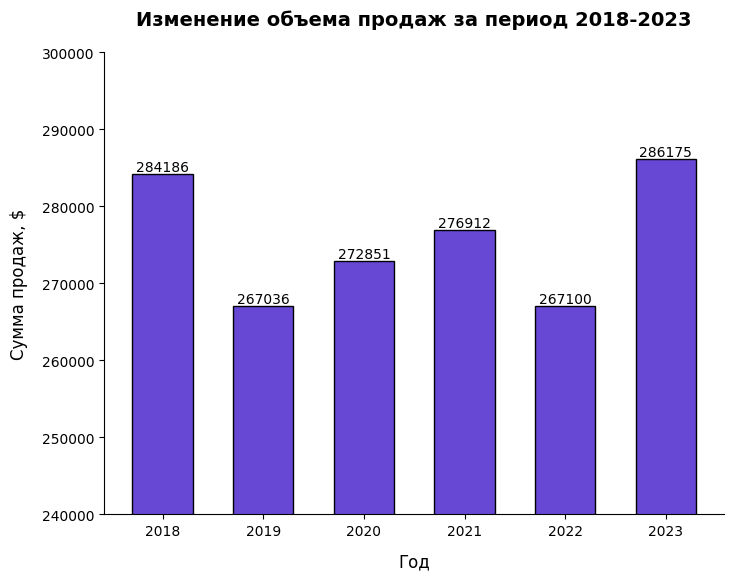

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar_label(plt.bar(total_sales_year_df['Year'], total_sales_year_df['Total_sales'],
                     color='#6748d5', width=0.6, edgecolor='k'))
ax.spines[['right', 'top']].set_visible(False) 
ax.set_ylim([240000, 300000])
ax.set_title('Изменение объема продаж за период 2018-2023', fontsize=14, pad=20, fontweight='bold')
plt.xlabel("Год", fontsize=12, labelpad=10)
plt.ylabel("Сумма продаж, $", fontsize=12, labelpad=10) 
plt.show()

Видим значительный рост в 2023 году. Найдем на сколько процентов выросли продажи относительно 2022 года.

In [12]:
total_sales_year_df['Total_sales'][5] / total_sales_year_df['Total_sales'][4] * 100

np.float64(107.14161975347163)

В период с 2019 по 2022 год разница в объеме продаж держалась в пределах **1-3.5 %**, но в 2023 году рост продаж составил **7%** относительно 2022 года.

##### **2.2. Исследуем изменения объема продаж по каждому году в зависимости от месяца** 

In [13]:
total_sales_month_df = christmas_sales_df.groupby(['Month', 'Year'])['TotalPrice'].sum().reset_index(name='Total_sales')
total_sales_month_df.head(12)

,Month,Year,Total_sales
0,December,2018,142342.446590
1,December,2019,138972.811413
2,December,2020,136671.669825
3,December,2021,141490.670354
4,December,2022,130781.785512
5,December,2023,145553.842173
6,November,2018,141843.898626
7,November,2019,128062.730662
8,November,2020,136179.587386
9,November,2021,135421.275339


In [14]:
# Для создании визуализации изменим вид таблицы
total_sales_month_df = total_sales_month_df.pivot(index='Year', columns='Month', values='Total_sales')
total_sales_month_df

Month,December,November
Year,,
2018,142342.446590,141843.898626
2019,138972.811413,128062.730662
2020,136671.669825,136179.587386
2021,141490.670354,135421.275339
2022,130781.785512,136318.113921
2023,145553.842173,140621.316440


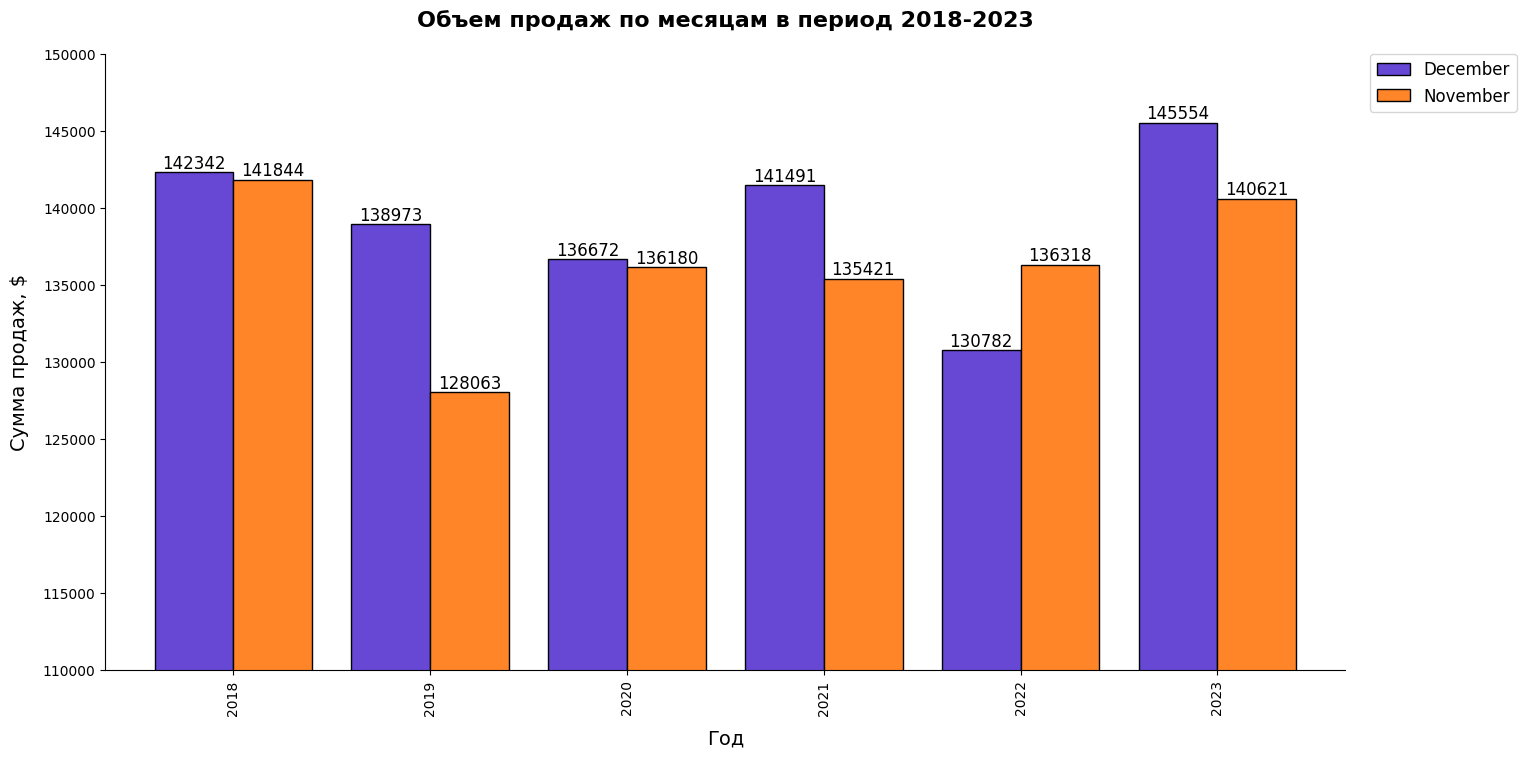

In [15]:
my_colors = ['#6748d5', '#ff8528']
splot = total_sales_month_df.plot(kind='bar', 
                                  figsize=(16,8),  
                                  color=my_colors, 
                                  width=0.8, 
                                  edgecolor='k')

splot.spines[['right', 'top']].set_visible(False) 
plt.xlabel("Год", fontsize=14, labelpad=10)
plt.ylabel("Сумма продаж, $", fontsize=14, labelpad=10)
plt.bar_label(splot.containers[0], fontsize=12)
plt.bar_label(splot.containers[1], fontsize=12)
plt.title('Объем продаж по месяцам в период 2018-2023', fontsize=16, pad=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad= 0, fontsize=12 ) #перенос легенды за пределы графика
plt.ylim([110000, 150000])
plt.show()

Люди совершают больше покупок преимущественно в декабре. Однако в 2022 году популярным месяцем для покупок был ноябрь.

##### **2.3. Выясним в какой день недели было больше всего продаж**

In [16]:
day_total_sale_df = christmas_sales_df.groupby(['Day', 'Year'])['TotalPrice'].sum().reset_index(name='Total_sales')
day_total_sale_df.head(5)

,Day,Year,Total_sales
0,Friday,2018,45609.053650
1,Friday,2019,39417.448716
2,Friday,2020,35354.553845
3,Friday,2021,36431.280577
4,Friday,2022,46561.789077


In [17]:
# Для построение графика преобразуем таблицу в другой вид
day_total_sale_df = day_total_sale_df.pivot(index='Year', columns='Day', values='Total_sales')
day_total_sale_df

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2018,45609.053650,43974.673398,33931.343330,41463.471324,39076.252224,37810.071761,42321.479529
2019,39417.448716,37482.075837,41917.686255,40002.990067,30356.493945,37450.262608,40408.584646
2020,35354.553845,38010.655068,34732.653932,43158.026494,39706.122906,42154.815177,39734.429789
2021,36431.280577,39564.260112,33287.254095,38812.179302,41434.049708,40459.982490,46922.939408
2022,46561.789077,31812.606036,39911.678077,33585.667444,37004.324834,36969.422669,41254.411295
2023,46568.477600,36331.885625,41749.540614,44102.800260,45681.775555,35203.156957,36537.522001


In [18]:
# Сделаем сортировку по дням неделеи
day_of_week = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_total_sale_df = day_total_sale_df.reindex(columns=day_of_week) 
day_total_sale_df

Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2018,43974.673398,37810.071761,42321.479529,39076.252224,45609.053650,33931.343330,41463.471324
2019,37482.075837,37450.262608,40408.584646,30356.493945,39417.448716,41917.686255,40002.990067
2020,38010.655068,42154.815177,39734.429789,39706.122906,35354.553845,34732.653932,43158.026494
2021,39564.260112,40459.982490,46922.939408,41434.049708,36431.280577,33287.254095,38812.179302
2022,31812.606036,36969.422669,41254.411295,37004.324834,46561.789077,39911.678077,33585.667444
2023,36331.885625,35203.156957,36537.522001,45681.775555,46568.477600,41749.540614,44102.800260


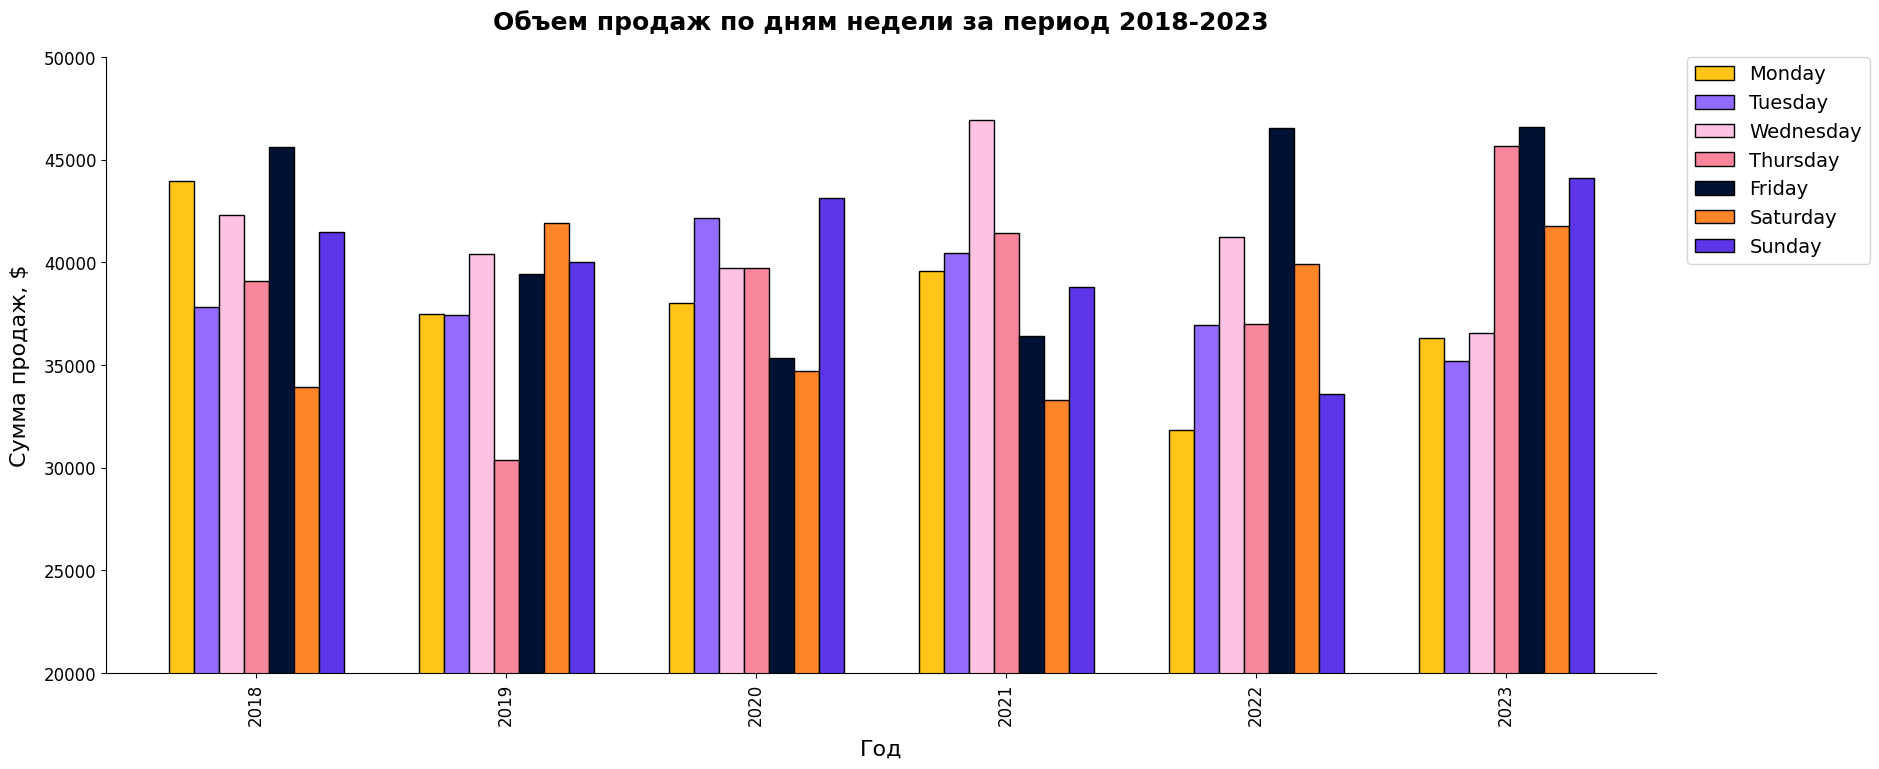

In [22]:
my_colors = ['#ffc518', '#936bff', '#ffc2e2', '#f7859c', '#001233', '#ff8528', '#5d36e7']
splot=day_total_sale_df.plot(kind = 'bar', 
                             figsize=(20, 8), 
                             color=my_colors, 
                             width=0.7, 
                             fontsize=12, 
                             edgecolor='k')

splot.spines[['right', 'top']].set_visible(False) 
plt.xlabel('Год', fontsize=16, labelpad=10)
plt.ylabel('Сумма продаж, $', fontsize=16, labelpad=10)
plt.title('Объем продаж по дням недели за период 2018-2023', fontsize=18, pad=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1.02 , 1), loc='upper left', borderaxespad= 0, fontsize=14)
plt.ylim([20000, 50000])

plt.show()

Пятница - наиболее предпочтительный день для покупок среди покупателей два последних года (2022-2023)

##### **2.4. Исследуем изменения в продажах в разбивке по категориям товаров**

In [20]:
total_sales_category_df = christmas_sales_df.groupby(['Category','Year'])['TotalPrice'].sum().reset_index(name='Total_sales')
total_sales_category_df.head()

,Category,Year,Total_sales
0,Clothing,2018,56431.320305
1,Clothing,2019,51144.539134
2,Clothing,2020,54693.339153
3,Clothing,2021,58732.085402
4,Clothing,2022,48561.608495


In [21]:
# Для построение графика преобразуем таблицу в другой вид
total_sales_category_df = total_sales_category_df.pivot(index='Year', columns='Category', values='Total_sales')
print(total_sales_category_df)

Category      Clothing   Decorations   Electronics          Food          Toys
Year                                                                          
2018      56431.320305  51948.192757  58120.839208  56732.032029  60953.960917
2019      51144.539134  50648.903243  58750.556874  48068.122065  58423.420758
2020      54693.339153  49807.306340  55532.538216  54379.515905  58438.557598
2021      58732.085402  51283.130742  53136.833667  60587.884653  53172.011229
2022      48561.608495  56106.968608  55198.838947  56912.392374  50320.091009
2023      51313.746884  64018.574154  55910.672754  55926.978550  59005.186271


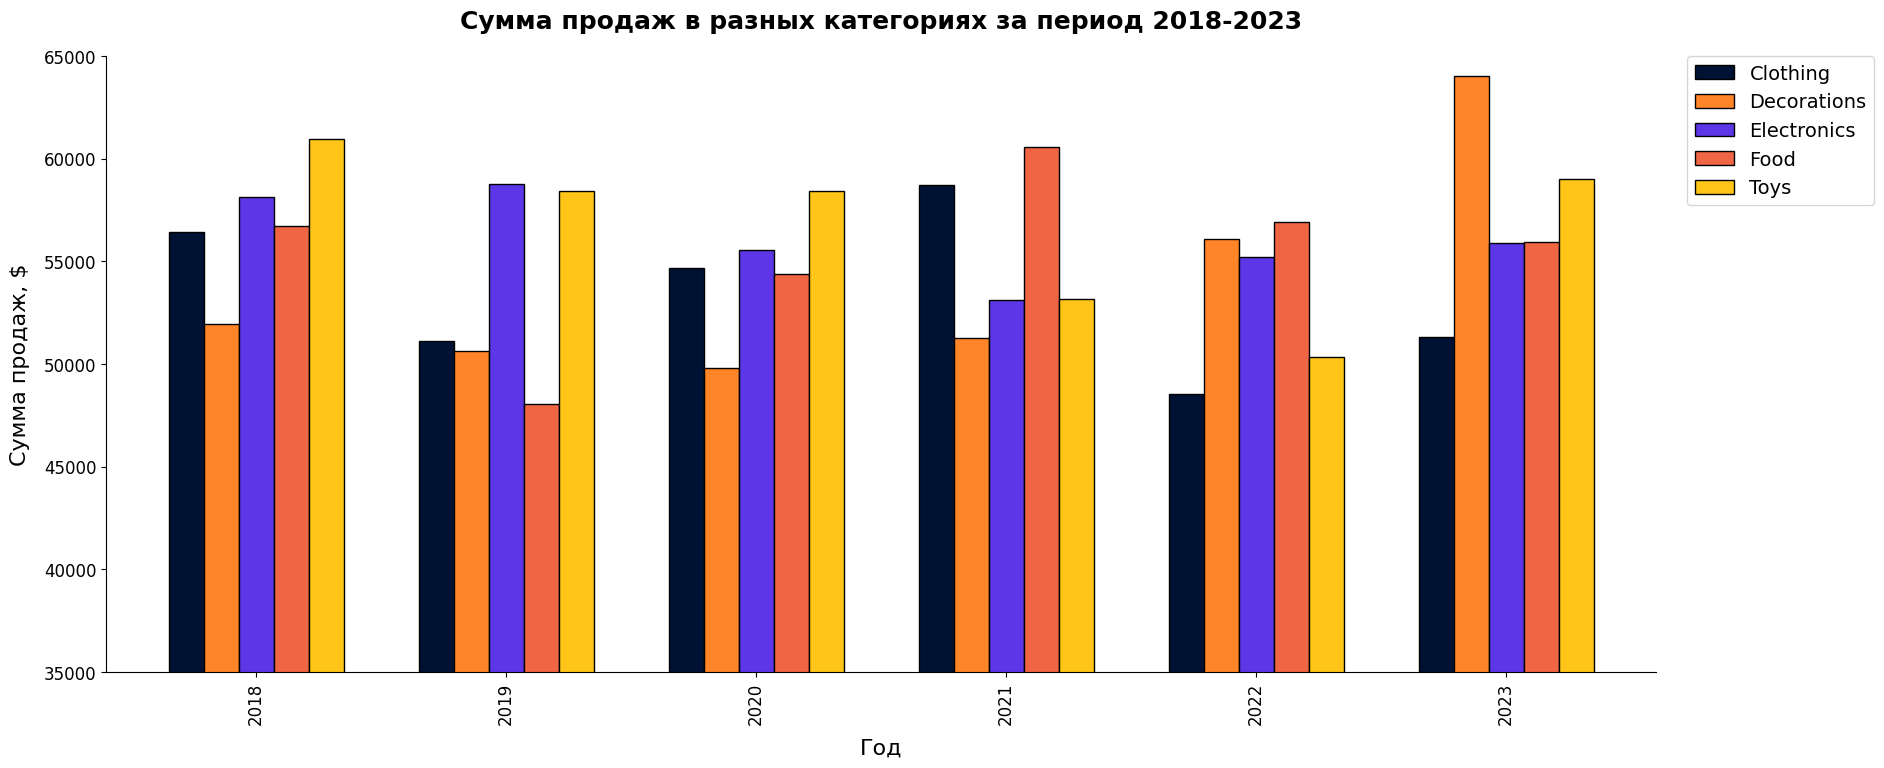

In [23]:

my_colors = ['#001233', '#ff8528', '#5d36e7', '#f06543', '#ffc518']
splot=total_sales_category_df.plot(kind='bar',
                                   figsize=(20,8), 
                                   color=my_colors, 
                                   width=0.7, 
                                   fontsize=12,
                                   edgecolor='k')

splot.spines[['right', 'top']].set_visible(False) 
plt.xlabel('Год', fontsize=16, labelpad=10)
plt.ylabel('Сумма продаж, $', fontsize=16, labelpad=10)
plt.title('Сумма продаж в разных категориях за период 2018-2023', fontsize=18, pad=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1.02 ,1), loc='upper left', borderaxespad=0, fontsize=14) 
plt.ylim([35000, 65000])
plt.show()

В 2023 году произошел заметный рост продаж в категориях декора и игрушек и спад продаж в категории еды.

Найдем на сколько % выросла/упала прибыль в этих категориях (сравниваем 2022 и 2023).

In [24]:
# Отбираем из всех данных те, что относятся к 2023 и 2022 году
year_2023_df = christmas_sales_df[christmas_sales_df['Year'] == 2023]
year_2022_df = christmas_sales_df[christmas_sales_df['Year'] == 2022]

# Отбираем те, что в категории украшения
category_2023_df = year_2023_df[year_2023_df['Category'] == 'Decorations']
category_2022_df = year_2022_df[year_2022_df['Category'] == 'Decorations']

# Находим процент
print(category_2023_df['TotalPrice'].sum() / category_2022_df['TotalPrice'].sum() * 100)

114.10093209787617


In [25]:
# Отбираем те, что в категории игрушек
category_2023_df = year_2023_df[year_2023_df['Category'] == 'Toys']
category_2022_df = year_2022_df[year_2022_df['Category'] == 'Toys']

# Находим процент
print(category_2023_df['TotalPrice'].sum() / category_2022_df['TotalPrice'].sum() * 100)

117.25969704769817


In [26]:
# Отбираем те, что в категории еды
category_2023_df = year_2023_df[year_2023_df['Category'] == 'Food']
category_2022_df = year_2022_df[year_2022_df['Category'] == 'Food']

# Находим процент
print(category_2022_df['TotalPrice'].sum() / category_2023_df['TotalPrice'].sum() * 100 )

101.76196506419035


1. В категории декора в 2023 году произошел рост продаж на 14% в сравнении с 2022 году.
2. В категории игрушек рост продаж составил 17%.
3. Продажи продуктов питания снизились на 1.8%.

##### **2.5. Проанализируем насколько часто случаются возвраты товаров**

**2.5.1. Рассмотрим весь период**

In [27]:
return_df = christmas_sales_df.groupby(['ReturnFlag', 'Year'])['TransactionID'].count().reset_index(name='Count')

# Для удобства визуализации заменим флаг на понятные значения
return_df = return_df.replace({'ReturnFlag': {True: 'returned',  
                                False: 'no_returned'}}) 

return_df.head()

,ReturnFlag,Year,Count
0,no_returned,2018,841
1,no_returned,2019,779
2,no_returned,2020,847
3,no_returned,2021,834
4,no_returned,2022,819


In [28]:
return_df_2 = return_df.pivot(index='Year', columns='ReturnFlag', values='Count')
return_df_2

ReturnFlag,no_returned,returned
Year,,
2018,841,848
2019,779,850
2020,847,831
2021,834,852
2022,819,820
2023,826,853


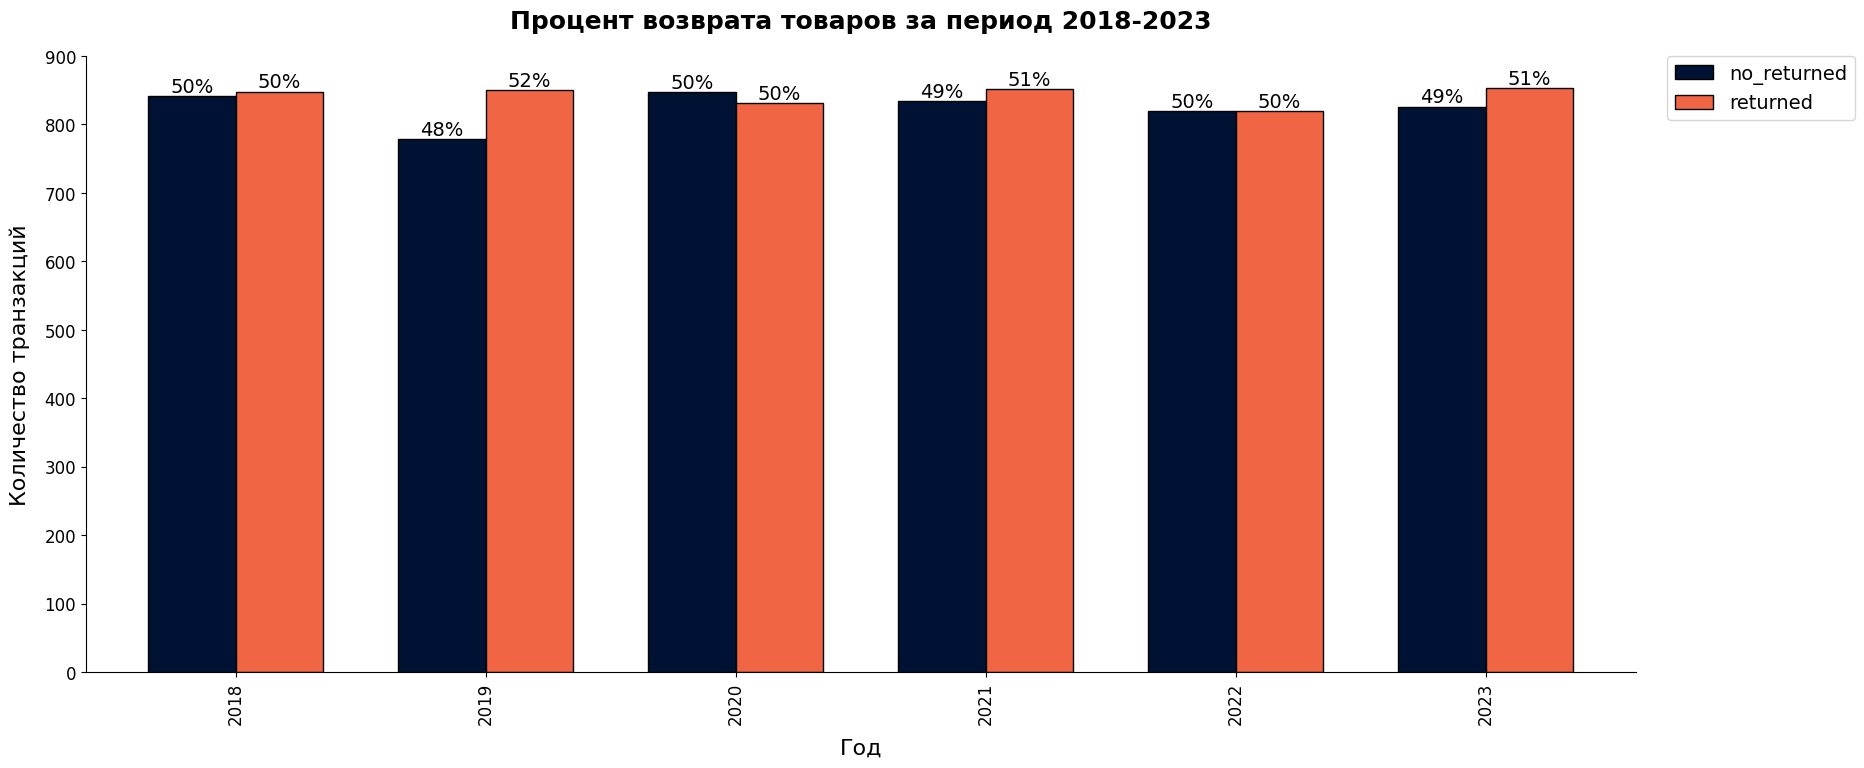

In [29]:
my_colors = ['#001233','#f06543']

splot = return_df_2.plot(kind='bar',
                         figsize=(20,8), 
                         color=my_colors, 
                         width=0.7, 
                         fontsize=12,
                         edgecolor = 'k')

splot.spines[['right', 'top']].set_visible(False)
plt.xlabel('Год', fontsize=16, labelpad=10)
plt.ylabel('Количество транзакций', fontsize=16, labelpad=10)
plt.title('Процент возврата товаров за период 2018-2023', fontsize=18, pad=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=14) 
plt.ylim([0, 900])

for p in plt.gca().patches:
    width = p.get_width()
    height = p.get_height()
    idx_bin = plt.gca().patches.index(p) # индекс текущего бина
    if idx_bin < int(len(plt.gca().patches)/2):
        percentage = height / (height + plt.gca().patches[idx_bin + int(len(plt.gca().patches)/2)].get_height()) # Сумма текущего и последующего
    else:
        percentage = height / (height + plt.gca().patches[idx_bin - int(len(plt.gca().patches)/2)].get_height()) # Сумма текущего и предыдущего
    percentage *= 100

    plt.text(p.get_x() + width / 2, height, f"{percentage:.0f}%", ha="center", va="bottom", 
             color='black', fontsize=14)

plt.show()


Процент возврата товаров за 2018-2023 держится на уровне ~50%

**2.5.2. Рассмотрим период 2022-2023 года и выясним на сколько процентов отличается количетсво возврата по категориям**

In [30]:
# Найдем количество всех покупок за 2022 и 2023 года
count_category_2023_df = year_2023_df.groupby(['Category'])['TransactionID'].count().reset_index(name='Total_orders')
count_category_2022_df = year_2022_df.groupby(['Category'])['TransactionID'].count().reset_index(name='Total_orders')

In [31]:
# Найдем количество товаров которые вернули за 2022 и 2023 года
count_return_order_2023 = year_2023_df \
    .groupby('Category')['ReturnFlag'] \
    .apply(lambda x: (x==True) \
    .sum ()) \
    .reset_index(name='Count_return_order')

count_return_order_2022 = year_2022_df \
    .groupby('Category')['ReturnFlag'] \
    .apply( lambda x: (x==True) \
    .sum ()) \
    .reset_index(name='Count_return_order')

In [32]:
# Создаем таблицу со столбцами категории, всего покупок и количеством товаров, которое вернули для 2022 и 2023 годов

column_2023 = count_return_order_2023["Count_return_order"]
count_return_order_2023_2022 = pd.concat([count_category_2023_df,column_2023], axis = 1)

f_column_2022 = count_return_order_2022["Count_return_order"]
count_return_order_2022 = pd.concat([count_category_2022_df,f_column_2022], axis = 1)

count_return_order_2022

,Category,Total_orders,Count_return_order
0,Clothing,315,152
1,Decorations,347,172
2,Electronics,342,179
3,Food,331,166
4,Toys,304,151


In [33]:
# Добавляем в таблицу с данными 2023 года столбец отношения возвратов к не возвратам 
count_return_order_2023_2022["Percentage of return_2023"] = count_return_order_2023_2022["Count_return_order"]/count_return_order_2023_2022["Total_orders"]*100
count_return_order_2023_2022["Percentage of return_2022"] = count_return_order_2022["Count_return_order"]/count_return_order_2022["Total_orders"]*100

# Удаляем ненужные для анализа столбцы 
count_return_order_2023_2022.drop('Total_orders', axis=1, inplace=True)
count_return_order_2023_2022.drop('Count_return_order', axis=1, inplace=True)

count_return_order_2023_2022.head(5)

,Category,Percentage of return_2023,Percentage of return_2022
0,Clothing,48.013245,48.253968
1,Decorations,54.016620,49.567723
2,Electronics,51.515152,52.339181
3,Food,48.387097,50.151057
4,Toys,51.594203,49.671053


В сравнении с 2022 годом в 2023 годум процент возврата в категории еды снизился почти на 2%, в то время как в категории декора и игрушек произошел рост товаров на возврат на 4,5% и 1,8% соответственно.

##### **2.6. Исследуем как зависит объем продаж от пола**

**2.6.1. Сначала посмотрим на весь период 2018-2023 года**

In [34]:
gender_quantity_df = christmas_sales_df.groupby(['Gender'])['Gender'].value_counts().reset_index(name='Quantity')
gender_quantity_df.head()

,Gender,Quantity
0,Female,3298
1,Male,3385
2,Other,3317


Количество покупателей мужского и женского пола примерно поровну, поэтому в дальнейшем анализе группа Other будет опущена.

In [35]:
gender_total_sale_df = christmas_sales_df.groupby(['Gender'])['TotalPrice'].sum().reset_index(name='Total_sales')
gender_total_sale_df = gender_total_sale_df.drop(
    gender_total_sale_df[gender_total_sale_df['Gender'] == 'Other'].index)
gender_total_sale_df.head()

,Gender,Total_sales
0,Female,548908.156149
1,Male,551765.002879


<Axes: title={'center': 'Доля объема продаж в зависимости от пола'}, ylabel=' '>

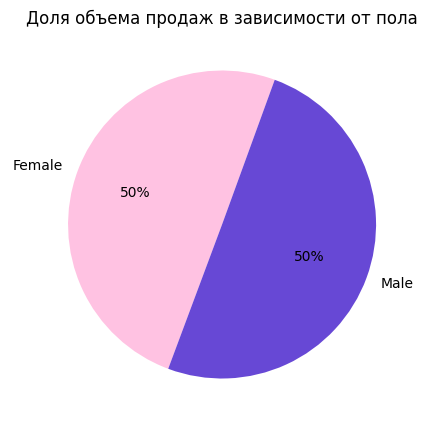

In [36]:
gender_total_sale_df.groupby(['Gender']).sum().plot(kind='pie', y='Total_sales', startangle=70, figsize=(5,5),
                    autopct='%1.0f%%',
                    colors=['#ffc2e2', '#6748d5'],
                    legend=False,
                    ylabel=' ',
                    title='Доля объема продаж в зависимости от пола'
                    )

За период 2018-2023 год мужчины и женщины потратили примерно одинаковое количество денег на новогодних праздниках.

**2.6.2. Рассмотрим более подробную картину по каждому году**

In [37]:
gender_sale_df = christmas_sales_df.groupby(['Gender','Year'])['TotalPrice'].sum().reset_index(name='Total_sales')
gender_sale_df = gender_sale_df.drop(
    gender_sale_df[gender_sale_df['Gender'] == 'Other'].index)
gender_sale_df.head(10)

,Gender,Year,Total_sales
0,Female,2018,96735.321157
1,Female,2019,86171.787609
2,Female,2020,93989.805750
3,Female,2021,93492.486104
4,Female,2022,86567.975280
5,Female,2023,91950.780250
6,Male,2018,97074.305179
7,Male,2019,89932.173681
8,Male,2020,87390.706091
9,Male,2021,88844.740206


In [38]:
# Для построение графика преобразуем таблицу в другой вид
gender_sale_df = gender_sale_df.pivot(index='Year', columns='Gender', values='Total_sales')
print(gender_sale_df)

Gender        Female           Male
Year                               
2018    96735.321157   97074.305179
2019    86171.787609   89932.173681
2020    93989.805750   87390.706091
2021    93492.486104   88844.740206
2022    86567.975280   87335.038260
2023    91950.780250  101188.039462


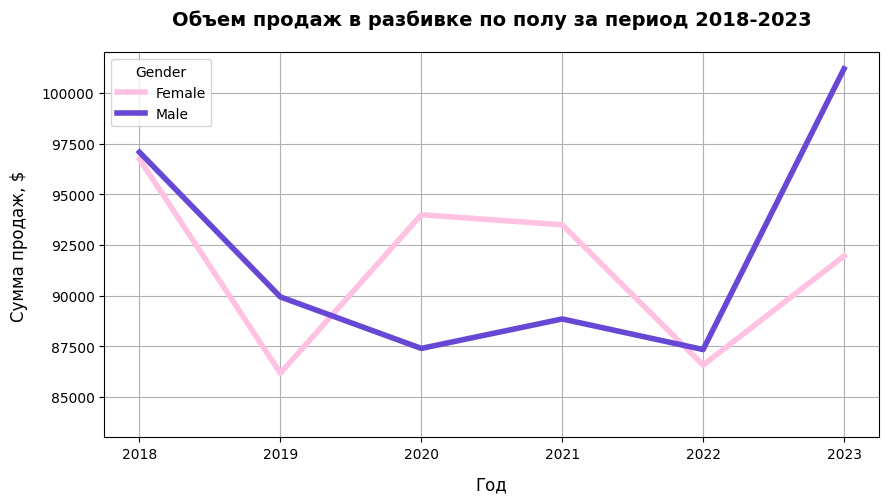

In [39]:

my_colors = ['#ffc2e2', '#6748d5']

gender_sale_df.plot(kind ='line',figsize=(10,5), color=my_colors, linewidth=4)

plt.title('Объем продаж в разбивке по полу за период 2018-2023', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Год', fontsize=12, labelpad=10)
plt.ylabel('Сумма продаж, $', fontsize=12, labelpad=10)
plt.ylim([83000, 102000])
plt.grid()

In [40]:
# Выберем 2023 год
gender_sale_2023_df = year_2023_df.groupby(['Gender'])['TotalPrice'].sum().reset_index(name='Total_sales')
gender_sale_2023_df.head(6)


,Gender,Total_sales
0,Female,91950.780250
1,Male,101188.039462
2,Other,93036.338901


In [41]:
gender_sale_2023_df['Total_sales'][1] / gender_sale_2023_df['Total_sales'][0] * 100

np.float64(110.04587365955301)

Последние 2 года (2022-2023) мужчины потратили больше денег, чем женщины. В 2023 году эта разница составила 10%.

**2.6.3. Узнаем в каких категориях мужины и женщины совершали больше покупок в 2023 году**

In [42]:
gender_category_df = year_2023_df.groupby(['Category','Gender'])['TotalPrice'].sum().reset_index(name='Total_sales')
gender_category_df = gender_category_df.drop(
    gender_category_df[gender_category_df['Gender'] == 'Other'].index)
gender_category_df.head(10)


,Category,Gender,Total_sales
0,Clothing,Female,15577.780598
1,Clothing,Male,18367.654260
3,Decorations,Female,22019.721683
4,Decorations,Male,21852.962654
6,Electronics,Female,17136.174505
7,Electronics,Male,20699.798871
9,Food,Female,17762.973298
10,Food,Male,19993.188701
12,Toys,Female,19454.130166
13,Toys,Male,20274.434977


In [43]:
# Для построение графика преобразуем таблицу в другой вид
gender_category_df = gender_category_df.pivot(index='Category', columns='Gender', values='Total_sales')
print(gender_category_df)

Gender             Female          Male
Category                               
Clothing     15577.780598  18367.654260
Decorations  22019.721683  21852.962654
Electronics  17136.174505  20699.798871
Food         17762.973298  19993.188701
Toys         19454.130166  20274.434977


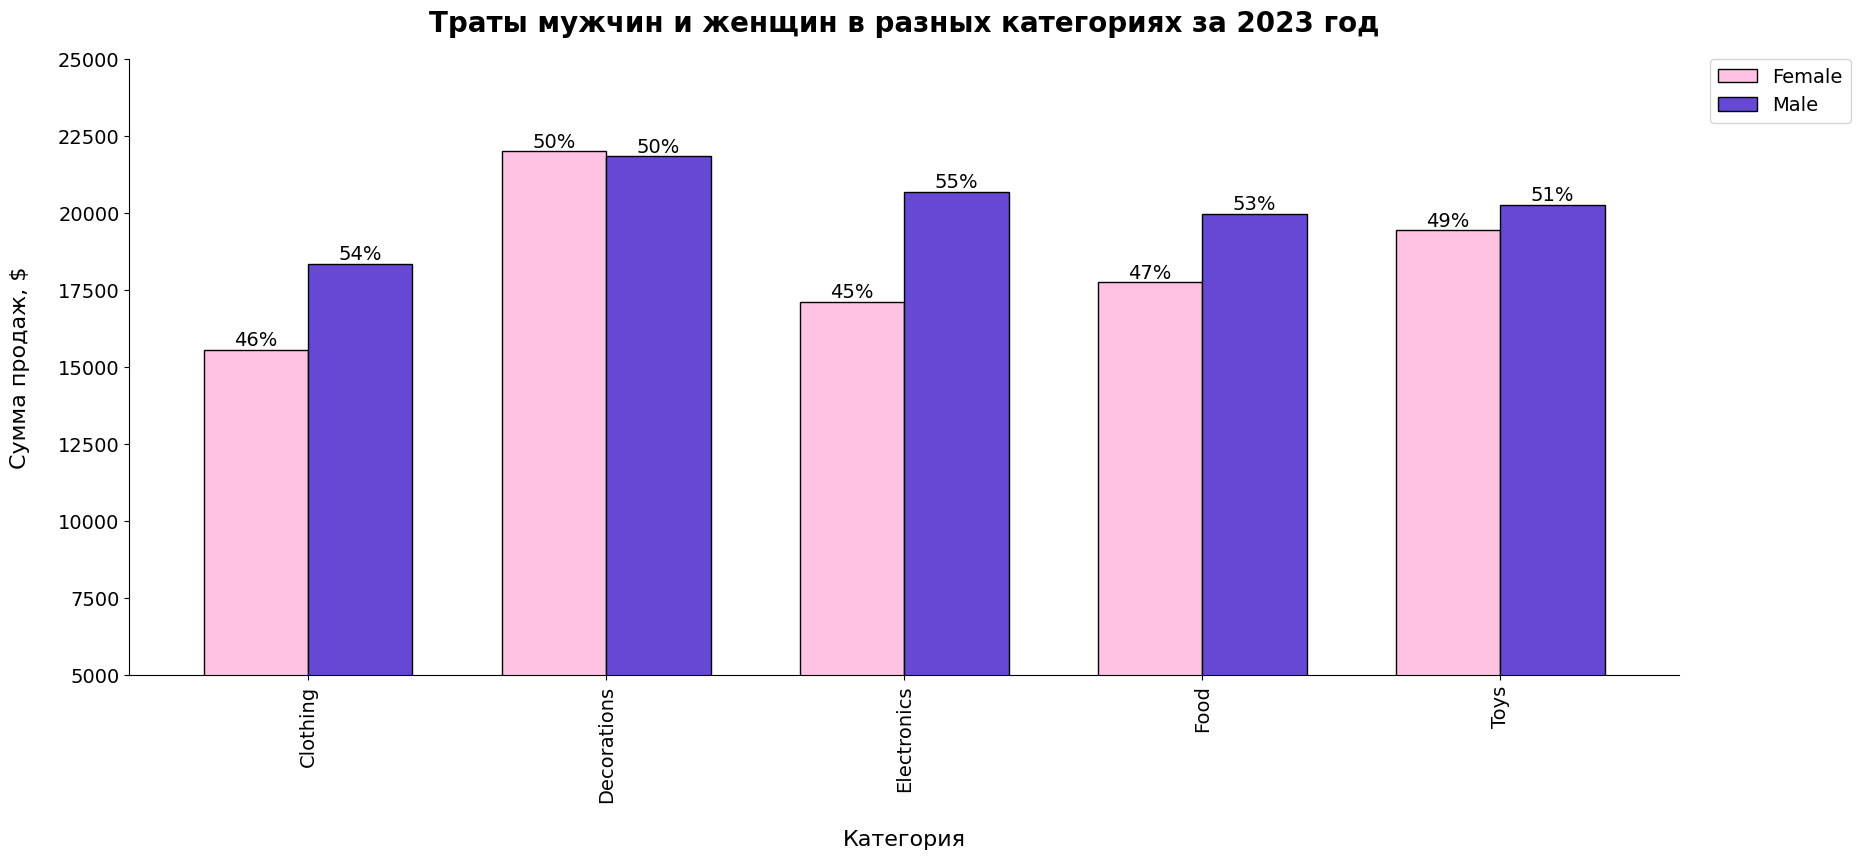

In [45]:
my_colors = ['#ffc2e2', '#6748d5']

splot = gender_category_df.plot(kind='bar', 
                                figsize=(20,8), 
                                color=my_colors, 
                                width=0.7, 
                                fontsize=14, 
                                edgecolor='k')

splot.spines[['right', 'top']].set_visible(False) 
plt.xlabel('Категория', fontsize=16, labelpad=20)
plt.ylabel('Сумма продаж, $', fontsize=16, labelpad=20)
plt.title('Траты мужчин и женщин в разных категориях за 2023 год', fontsize=20, pad=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=14) 
plt.ylim([5000, 25000])

for p in plt.gca().patches:
    width = p.get_width()
    height = p.get_height()
    idx_bin = plt.gca().patches.index(p) # индекс текущего бина
    if idx_bin < int(len(plt.gca().patches)/2):
        percentage = height / (height + plt.gca().patches[idx_bin + int(len(plt.gca().patches)/2)].get_height()) # Сумма текущего и последующего
    else:
        percentage = height / (height + plt.gca().patches[idx_bin - int(len(plt.gca().patches)/2)].get_height()) # Сумма текущего и предыдущего
    percentage *= 100

    plt.text(p.get_x() + width / 2, height, f"{percentage:.0f}%", ha="center", va="bottom", 
             color='black', fontsize=14)

plt.show()

Категория декора пользовалась популярностью и у женщин и у мужчин. Все же остальные категории, включая категорию игрушек, продажи в которой выросли в сравнении с предыдущим 2022 годом, пользовались спросом у мужчин.

##### **2.7. Проанализируем в какую проведенную акцию (черная пятница, рождественская ярмарка) было совершено больше всего продаж**

In [46]:
event_df = christmas_sales_df.groupby(['Event', 'Year'])['TotalPrice'].sum().reset_index(name='Total_sales')
event_df.head()

,Event,Year,Total_sales
0,Black Friday,2018,113420.938617
1,Black Friday,2019,113275.210352
2,Black Friday,2020,113506.997174
3,Black Friday,2021,119448.855221
4,Black Friday,2022,114897.074780


In [47]:
# Для построение графика преобразуем таблицу в другой вид
event_df_2 = event_df.pivot(index='Year', columns='Event', values='Total_sales')
event_df_2

Event,Black Friday,Christmas Market,Without event
Year,,,
2018,113420.938617,89170.132145,81595.274455
2019,113275.210352,77007.402638,76752.929084
2020,113506.997174,82762.450576,76581.809461
2021,119448.855221,77822.075574,79641.014897
2022,114897.074780,75513.425571,76689.399082
2023,120905.410120,81298.020852,83971.727641


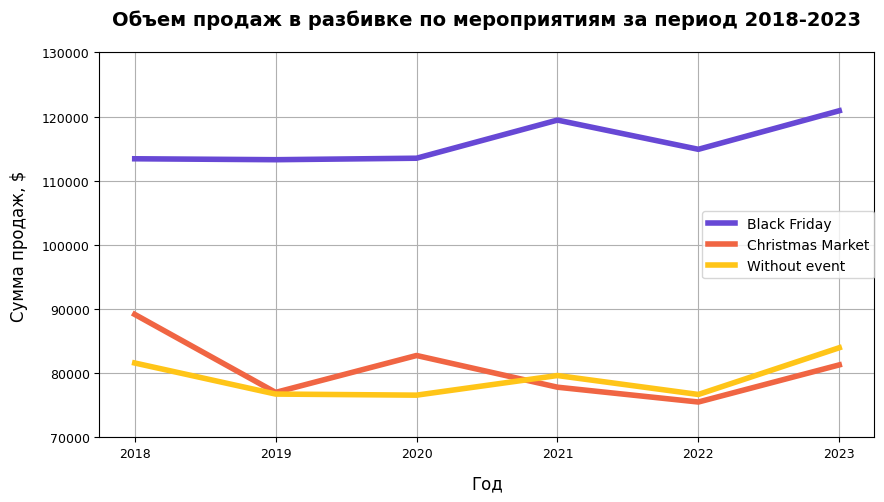

In [48]:
my_colors = ['#6748d5', '#f06543', '#ffc518']

event_df_2.plot(kind='line', figsize=(10,5), color=my_colors, linewidth=4, fontsize=9)
plt.title('Объем продаж в разбивке по мероприятиям за период 2018-2023', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Год', fontsize=12, labelpad=10)
plt.ylabel('Сумма продаж, $', fontsize=12, labelpad=10)
plt.ylim([70000, 130000])
plt.legend(loc='center right', borderaxespad=0, fontsize=10) 
plt.grid()


Видим значительную разницу между такими мероприятиями как черная пятница и рождественская ярмарка.

Выясним сколько процентов от общей прибыли приходится на черную пятницу в 2023 году.

<Axes: title={'center': 'Доля продаж в зависимости от проведенных мероприятий в 2023 году'}, ylabel=' '>

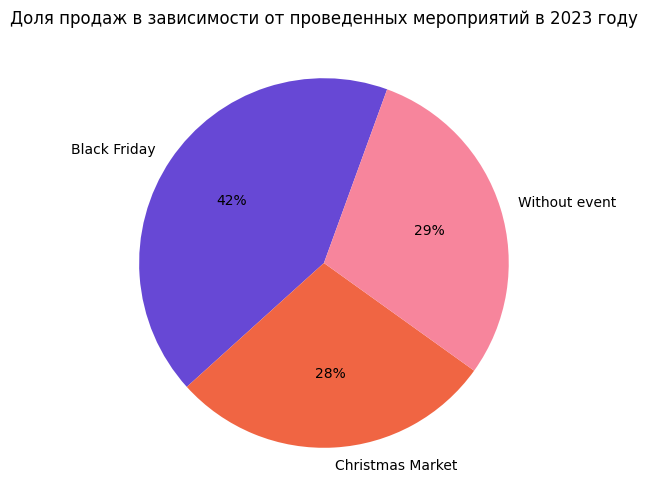

In [50]:
event_2023_df = event_df[event_df['Year']==2023]

event_2023_df.groupby(['Event']).sum().plot(kind='pie', 
                                            y='Total_sales', 
                                            startangle=70, 
                                            figsize=(6,6),
                                            autopct='%1.0f%%',
                                            colors=['#6748d5', '#f06543', '#f7859c'],
                                            legend=False,
                                            ylabel=' ',
                                            title='Доля продаж в зависимости от проведенных мероприятий в 2023 году'
                    )

В 2023 году объем продаж в черную пятницу составляет 42% от общего объема продаж.
В сравнении с предыдущим годом увеличился объем продаж и на рождественской ярмарке, однако он все еще остается чуть меньше, чем объем продаж товаров приобретенных без какого-либо события вообще.

##### **2.8. Проанализируем как менялся процент покупок совершенных онлайн**

In [67]:
online_df = christmas_sales_df.groupby(['OnlineOrderFlag', 'Year'])['TransactionID'].count().reset_index(name='Count')

# Для удобства визуализации заменим флаг на понятные значения
online_df = online_df.replace({'OnlineOrderFlag': {True: 'online',  
                                False: 'offline'}}) 

online_df.head()

,OnlineOrderFlag,Year,Count
0,offline,2018,1212
1,offline,2019,997
2,offline,2020,830
3,offline,2021,720
4,offline,2022,483


In [75]:
online_df = online_df.pivot(index='Year', columns='OnlineOrderFlag', values='Count')
online_df

OnlineOrderFlag,offline,online
Year,,
2018,1212,477
2019,997,632
2020,830,848
2021,720,966
2022,483,1156
2023,340,1339


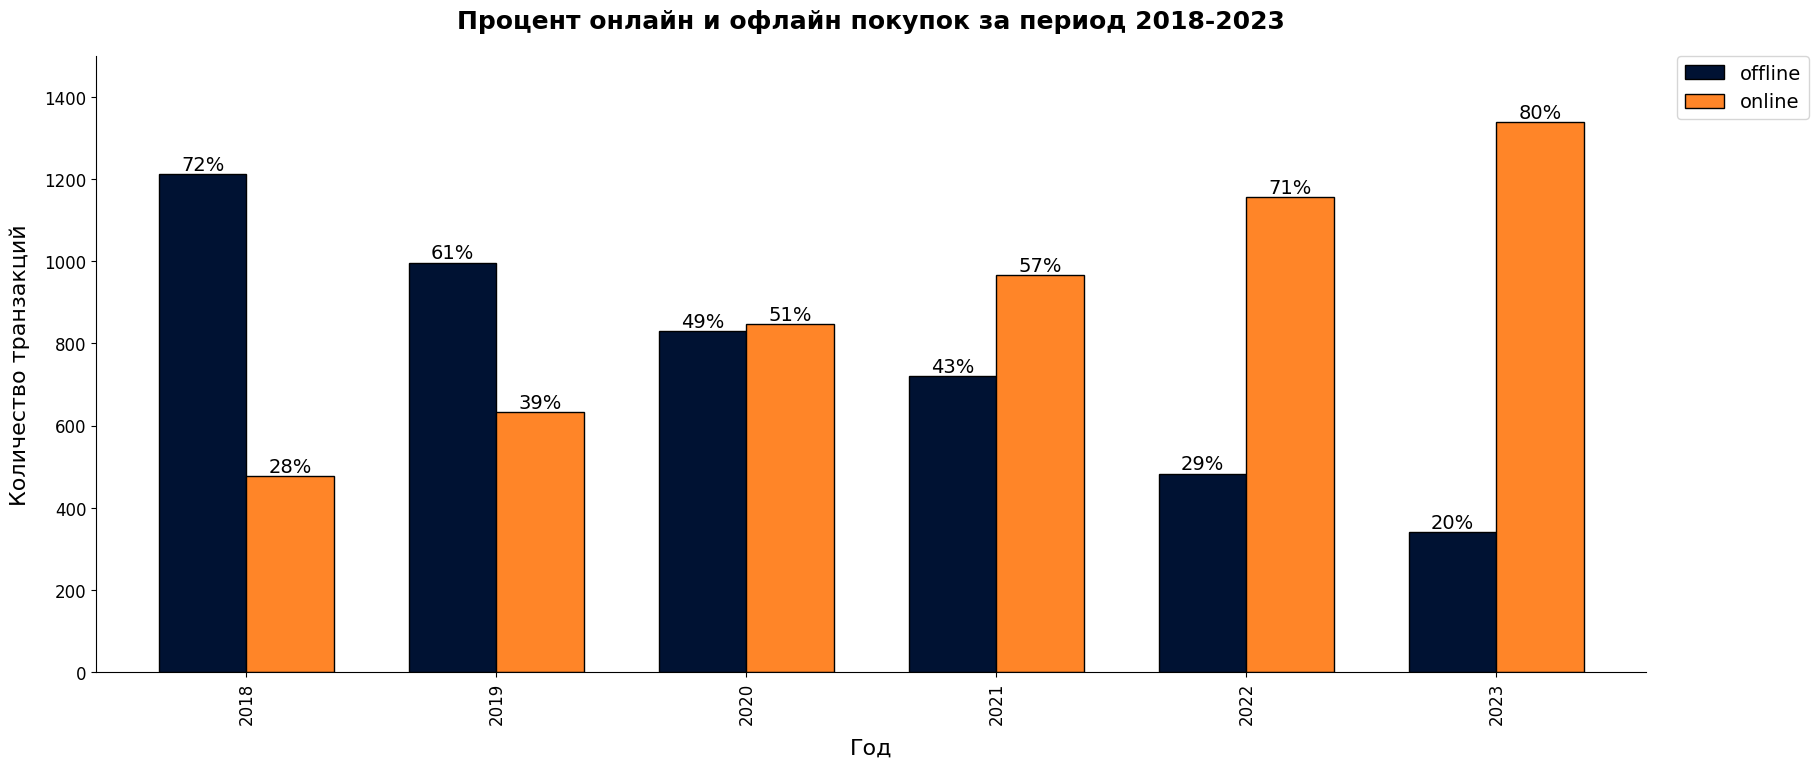

In [76]:
my_colors = ['#001233','#ff8528']

splot = online_df.plot(kind='bar',
                         figsize=(20,8), 
                         color=my_colors, 
                         width=0.7, 
                         fontsize=12,
                         edgecolor = 'k')

splot.spines[['right', 'top']].set_visible(False)
plt.xlabel('Год', fontsize=16, labelpad=10)
plt.ylabel('Количество транзакций', fontsize=16, labelpad=10)
plt.title('Процент онлайн и офлайн покупок за период 2018-2023', fontsize=18, pad=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=14) 
plt.ylim([0, 1500])

for p in plt.gca().patches:
    width = p.get_width()
    height = p.get_height()
    idx_bin = plt.gca().patches.index(p) # индекс текущего бина
    if idx_bin < int(len(plt.gca().patches)/2):
        percentage = height / (height + plt.gca().patches[idx_bin + int(len(plt.gca().patches)/2)].get_height()) # Сумма текущего и последующего
    else:
        percentage = height / (height + plt.gca().patches[idx_bin - int(len(plt.gca().patches)/2)].get_height()) # Сумма текущего и предыдущего
    percentage *= 100

    plt.text(p.get_x() + width / 2, height, f"{percentage:.0f}%", ha="center", va="bottom", 
             color='black', fontsize=14)

plt.show()

##### **2.9. Анализ по возрасту и категориям**

**2.9.1. Посмотрим на какой возраст приходится большая часть продаж за весь период (2018-2023)**

In [51]:
# Выделим группы
sales_age_18_30_df = christmas_sales_df[christmas_sales_df['Age'].apply(lambda x:((x>=18)&(x<=30)))]
sales_age_31_45_df = christmas_sales_df[christmas_sales_df['Age'].apply(lambda x:((x>=31)&(x<=45)))]
sales_age_46_55_df = christmas_sales_df[christmas_sales_df['Age'].apply(lambda x:((x>=46)&(x<=55)))]
sales_age_56_70_df = christmas_sales_df[christmas_sales_df['Age'].apply(lambda x:((x>=56)&(x<=70)))]


# Создадим таблицу
age_df = {'Age': ['18-30', '31-45', '46-55', '56-70'],
          'Total_sales': [sales_age_18_30_df['TotalPrice'].sum(),
                          sales_age_31_45_df['TotalPrice'].sum(),
                          sales_age_46_55_df['TotalPrice'].sum(),
                          sales_age_56_70_df['TotalPrice'].sum(),]}
age_df = pd.DataFrame(age_df)
print(age_df) 

     Age    Total_sales
0  18-30  419545.152077
1  31-45  455204.308350
2  46-55  309440.688500
3  56-70  470069.999313


<Axes: title={'center': 'Доля продаж каждой возрастной группы за 2018-2023 год'}, ylabel=' '>

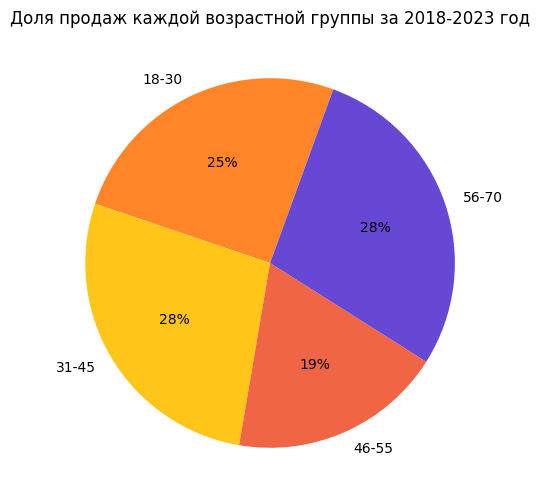

In [52]:
age_df.groupby(['Age']).sum().plot(kind='pie',
                                   y='Total_sales',
                                   startangle=70,
                                   figsize=(6, 6),
                                   autopct='%1.0f%%',
                                   colors=['#ff8528', '#ffc518', '#f06543', '#6748d5'],
                                   legend=False,
                                   ylabel=' ',
                                   title='Доля продаж каждой возрастной группы за 2018-2023 год'
                                   )

За период 2018-2023 годах почти 60% от всего объема продаж приходится на возрастные категории 31-45 лет и 56-70 лет.

**2.9.2. Рассмотрим в каких категориях какая возрастная группа чаще делает покупки**

In [54]:
category_18_30_df = sales_age_18_30_df.groupby(['Category', 'Year'])['TotalPrice'].sum().reset_index(name='Total_sales')
category_18_30_df.head()

,Category,Year,Total_sales
0,Clothing,2018,17296.967393
1,Clothing,2019,13574.875894
2,Clothing,2020,12137.173965
3,Clothing,2021,14215.213262
4,Clothing,2022,13143.941182


In [55]:
# Для построение графика преобразуем таблицу в другой вид
category_18_30_df = category_18_30_df.pivot(index='Year', columns='Category',values='Total_sales')
category_18_30_df.head()

Category,Clothing,Decorations,Electronics,Food,Toys
Year,,,,,
2018,17296.967393,16196.913211,13832.861500,13760.713038,14982.562416
2019,13574.875894,14143.403656,15701.357221,10992.914199,13735.017097
2020,12137.173965,14341.927696,12063.257100,13398.076588,15428.353097
2021,14215.213262,14875.546186,10963.286111,15205.221131,13424.769007
2022,13143.941182,15769.142372,12417.330539,12922.434635,13680.677932


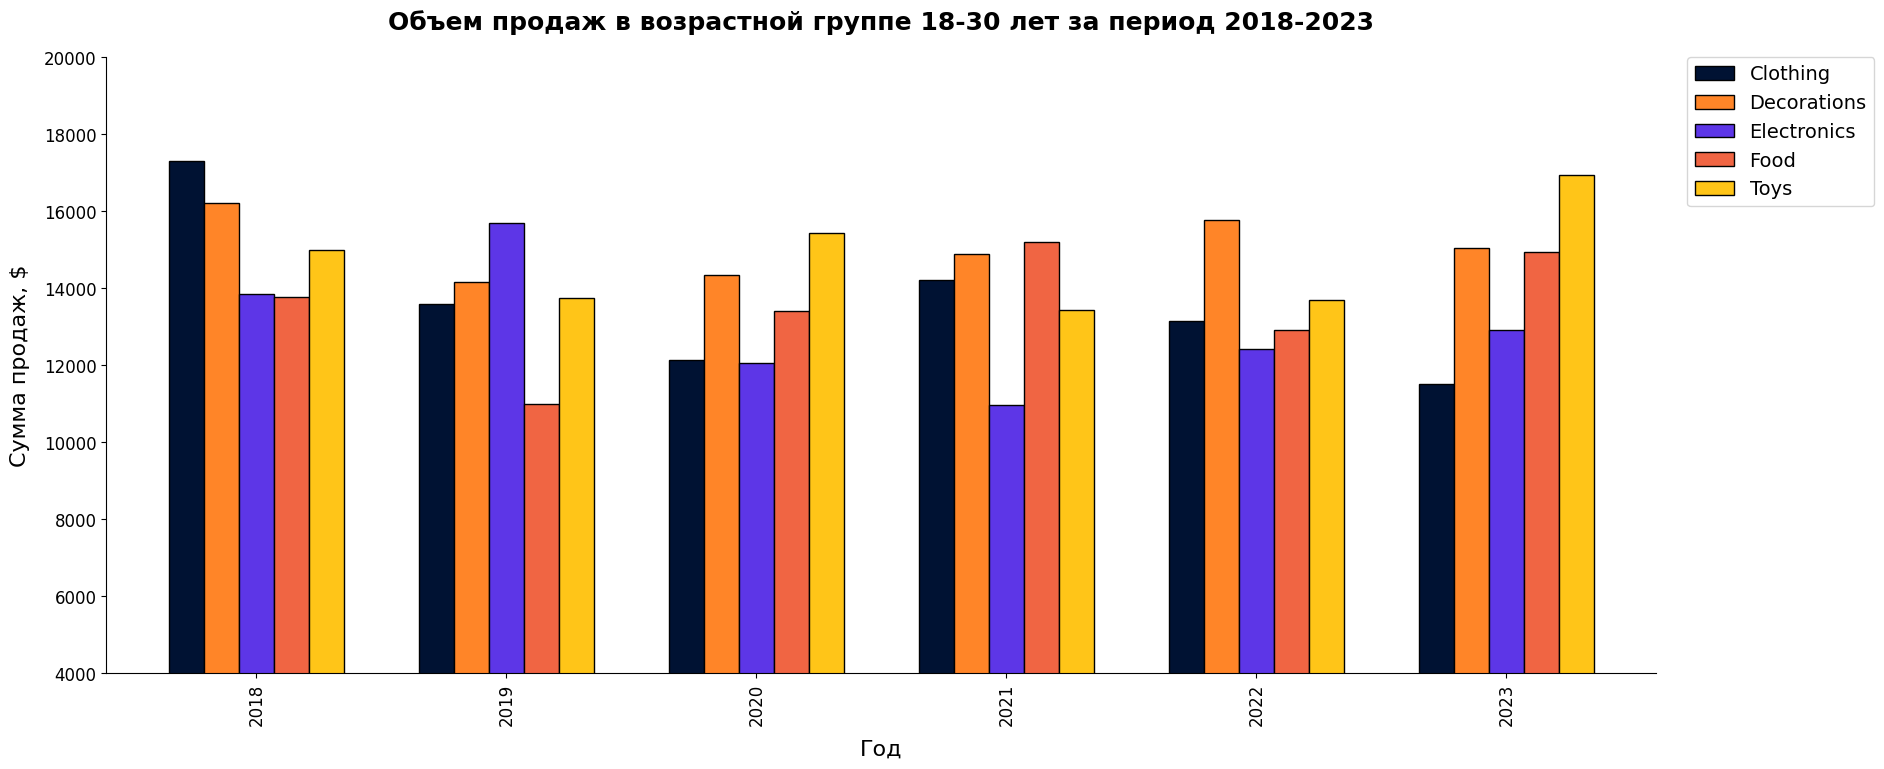

In [56]:
my_colors = ['#001233', '#ff8528', '#5d36e7', '#f06543', '#ffc518']
splot=category_18_30_df.plot(kind='bar',
                             figsize=(20,8), 
                             color=my_colors, 
                             width=0.7, 
                             fontsize=12,
                             edgecolor = 'k')

splot.spines[['right', 'top']].set_visible(False) 
plt.xlabel('Год', fontsize=16, labelpad=10)
plt.ylabel('Сумма продаж, $', fontsize=16, labelpad=10)
plt.title('Объем продаж в возрастной группе 18-30 лет за период 2018-2023', fontsize=18, pad=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=14) 
plt.ylim([4000, 20000])
plt.show()

Среди людей 18-30 лет в 2023 году пользовалась популярностью категория игрушек, чего не скажешь о категории одежды и декора, которые упали в сравнении с прошлым 2022 годом.

In [57]:
category_31_45_df = sales_age_31_45_df.groupby(['Category', 'Year'])['TotalPrice'].sum().reset_index(name='Total_sales')
category_31_45_df.head()

,Category,Year,Total_sales
0,Clothing,2018,13345.189253
1,Clothing,2019,13452.986266
2,Clothing,2020,13998.456668
3,Clothing,2021,15803.571900
4,Clothing,2022,11059.209519


In [58]:
category_31_45_df = category_31_45_df.pivot(index='Year', columns='Category',values='Total_sales')

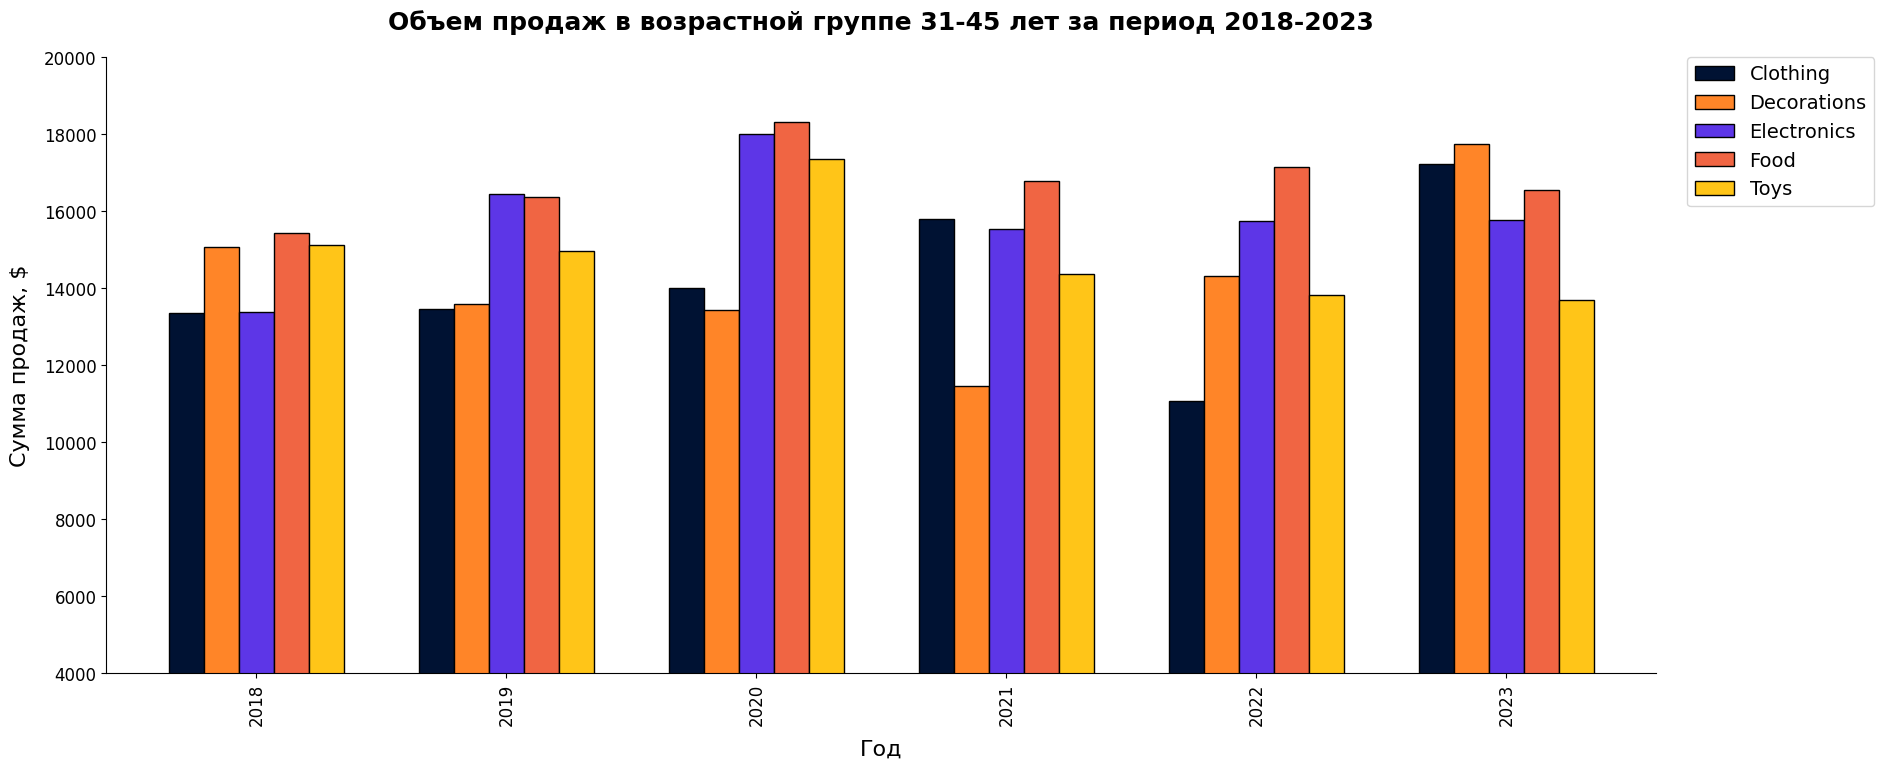

In [59]:
splot = category_31_45_df.plot(kind='bar',
                               figsize=(20,8),
                               color=my_colors,
                               width=0.7,
                               fontsize=12,
                               edgecolor = 'k')

splot.spines[['right', 'top']].set_visible(False)
plt.xlabel('Год', fontsize=16, labelpad=10)
plt.ylabel('Сумма продаж, $', fontsize=16, labelpad=10)
plt.title('Объем продаж в возрастной группе 31-45 лет за период 2018-2023', fontsize=18, pad=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.ylim([4000, 20000])
plt.show()

Категории декора и одежды в 2023 году пользовались спросом у людей в возрасте 31-45 лет, а вот категория еды упала в продажах, хотя 3 года до этого лидировала как самая прибыльная.

In [60]:
category_46_55_df = sales_age_46_55_df.groupby(['Category', 'Year'])['TotalPrice'].sum().reset_index(name='Total_sales')
category_46_55_df.head()

,Category,Year,Total_sales
0,Clothing,2018,10407.278719
1,Clothing,2019,8243.817814
2,Clothing,2020,11843.613147
3,Clothing,2021,11666.021432
4,Clothing,2022,10439.701489


In [61]:
category_46_55_df = category_46_55_df.pivot(index='Year', columns='Category', values='Total_sales')

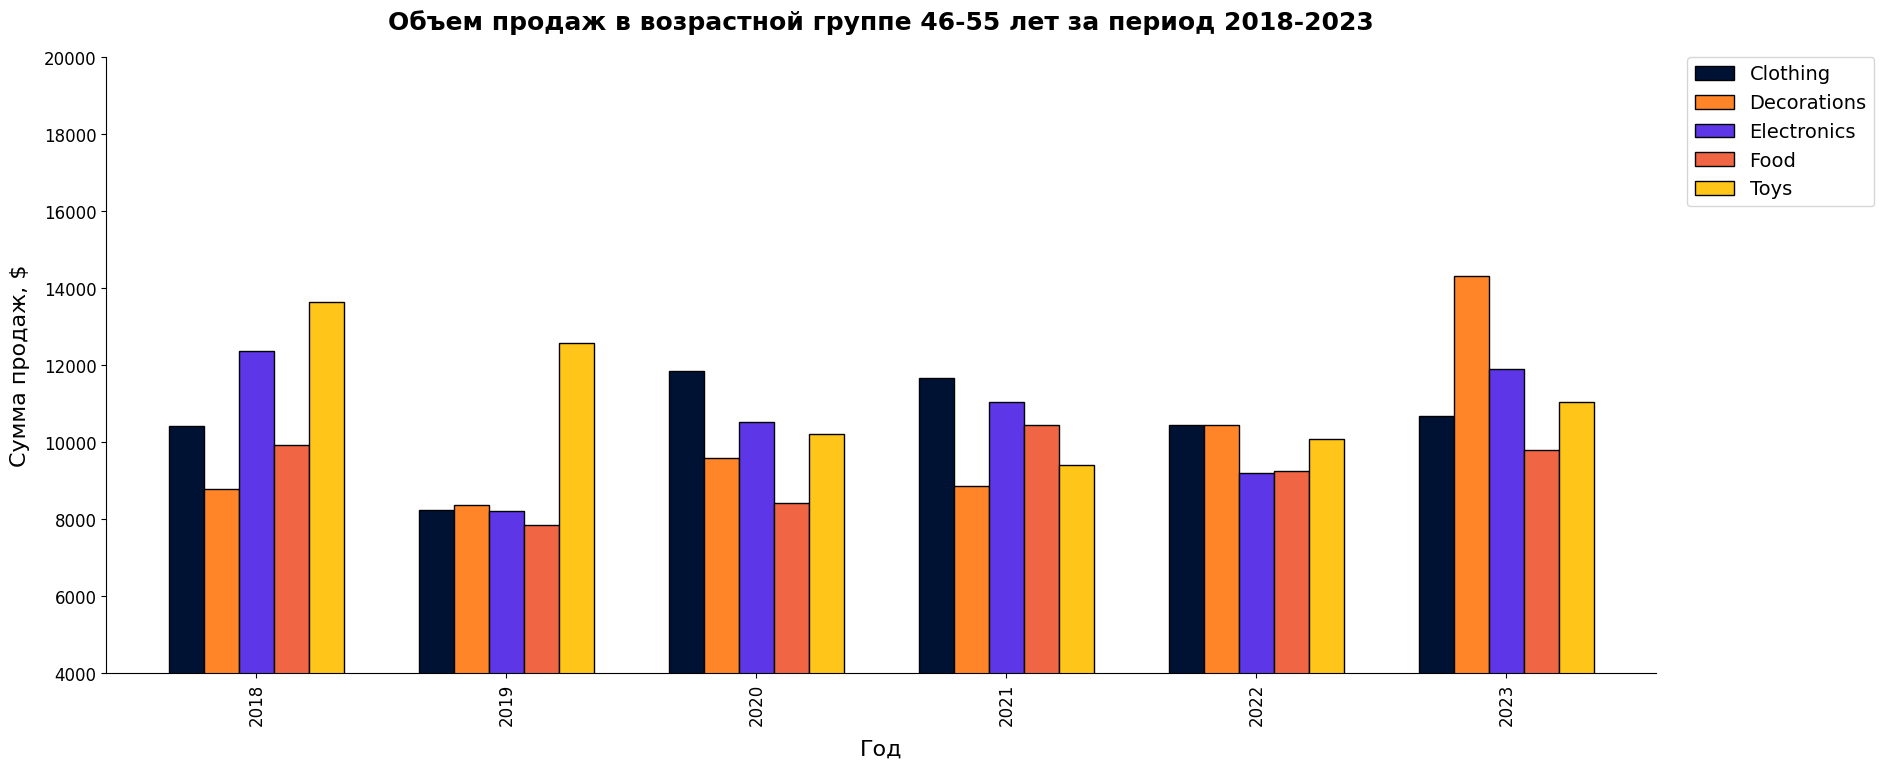

In [62]:
splot = category_46_55_df.plot(kind='bar',
                               figsize=(20,8), 
                               color=my_colors, 
                               width=0.7, 
                               fontsize=12,
                               edgecolor = 'k')


splot.spines[['right', 'top']].set_visible(False)
plt.xlabel('Год', fontsize=16, labelpad=10)
plt.ylabel('Сумма продаж, $', fontsize=16, labelpad=10)
plt.title('Объем продаж в возрастной группе 46-55 лет за период 2018-2023', fontsize=18, pad=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.ylim([4000, 20000])
plt.show()

В возрастной группе 46-55 в 2023 году выросли продажи во всех категориях, но самый большой прирост произошел в категории декора.

In [63]:
category_56_70_df = sales_age_56_70_df.groupby(['Category', 'Year'])['TotalPrice'].sum().reset_index(name='Total_sales')
category_56_70_df.head()

,Category,Year,Total_sales
0,Clothing,2018,15381.884940
1,Clothing,2019,15872.859160
2,Clothing,2020,16714.095372
3,Clothing,2021,17047.278809
4,Clothing,2022,13918.756305


In [64]:
category_56_70_df = category_56_70_df.pivot(index='Year', columns='Category',values='Total_sales')

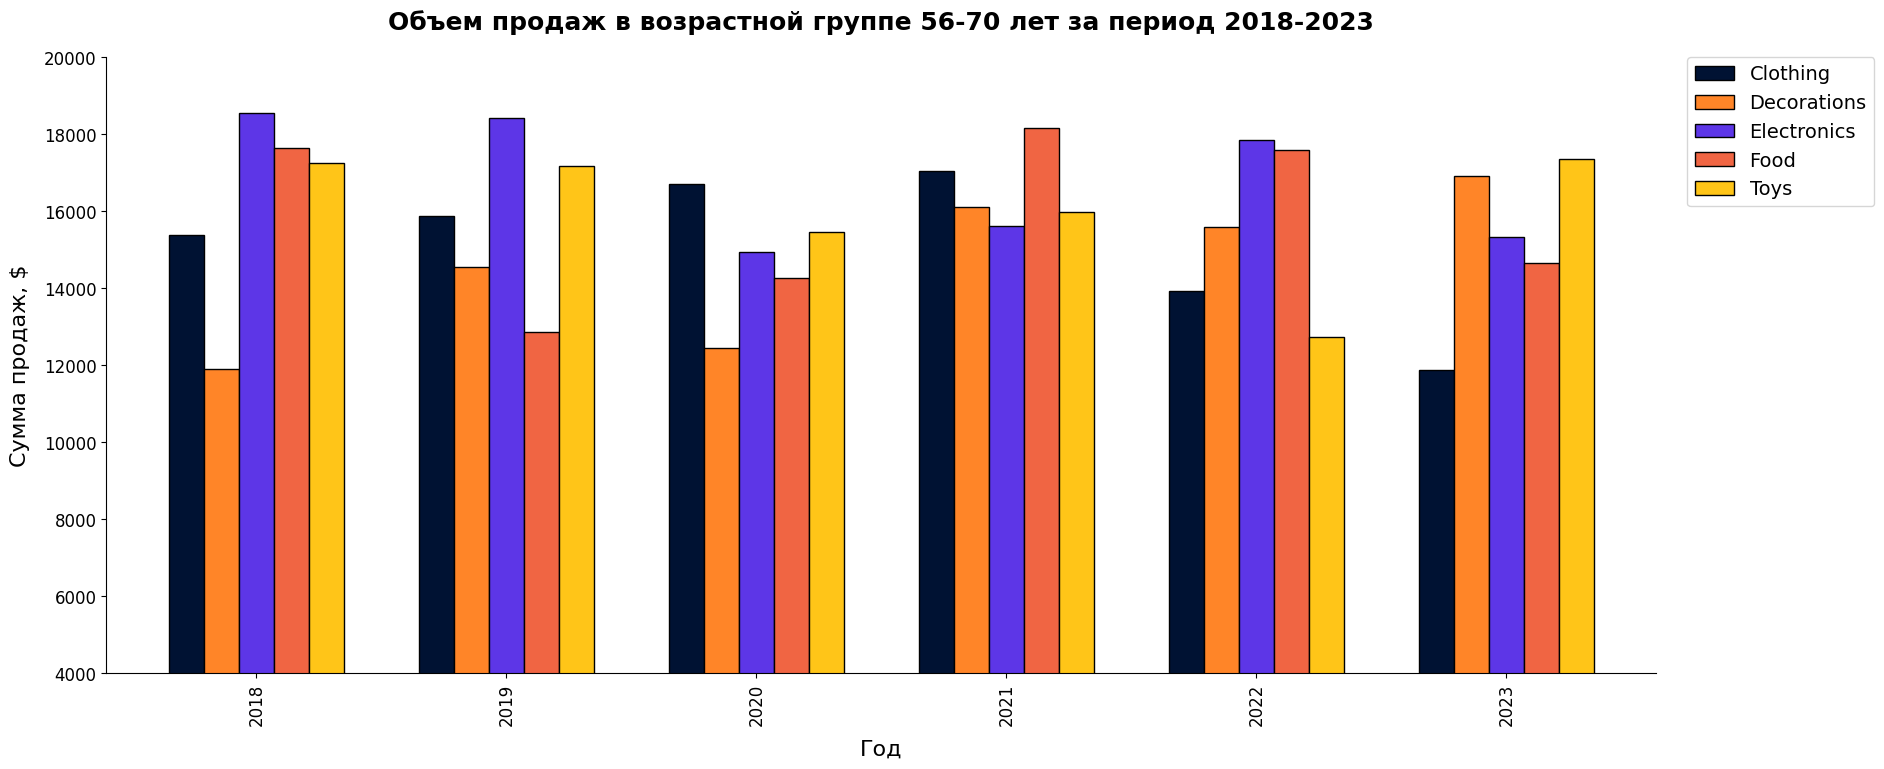

In [65]:
splot = category_56_70_df.plot(kind='bar',
                               figsize=(20,8), 
                               color=my_colors, 
                               width=0.7, 
                               fontsize=12,
                               edgecolor = 'k')


splot.spines[['right', 'top']].set_visible(False)
plt.xlabel('Год', fontsize=16, labelpad=10)
plt.ylabel('Сумма продаж, $', fontsize=16, labelpad=10)
plt.title('Объем продаж в возрастной группе 56-70 лет за период 2018-2023', fontsize=18, pad=20, fontweight='bold')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.ylim([4000, 20000])
plt.show()



Люди возраста 56-70 лет в 2023 году предпочитали покупать товары категории игрушек и декора. Также в этой возрастной категории наблюдается спад продаж в категориях еды, одежды и электроники.

#### **Шаг 3. Вывод по проделанной работе**

В 2023 году произошел рост продаж на 7% в сравнении с 2022. Заметное увеличение продаж произошло в категориях декора и игрушек и составило 14% и 17% соответсвенно.

Категория декора в 2023 году пользовалась одинаковым спросом у обоих полов в возрастных группах 31-45 и 56-70 лет. Категория игрушек имела наибольший спрос в возрастных группах 18-30 и 56-70 лет, преимущественно у людей мужского пола. 
Также мужчины совершали больше покупок в категориях электроники, одежды и еды. 
В 2023 году мужчины потратили на 10% больше денег, чем женщины.

За период 2018-2023 почти 60% от общего объема продаж приходится на взрослых людей возраста 31-45 лет и 56-70 лет.

Однако в возрастной категории 56-70 лет два последних года (2022-2023) наблюдался спад продаж в категории еды, а в 2023 еще и в одежде и элеткронике. 

В период 2018-2023 средняя оценка удовлетворенности клиентов составляет 2.98 по 5-ти бальной шкале. Показатель возврата товаров за тот же период держиться на уровне ~50%.

В 2023 году процент покупок совершенных онлайн достиг значение 80%, что на 60% больше покупок совершенных в офлайн магазинах. Это говорит о необходимости сделать опыт покупок в онлайне как можно более простым и приятным для пользователя, повысив тем самым уровень удовлетворенности клиентов и сократить количество возвратов.

За период 2018-2023 мероприятие «Черная пятница» лидирует в объеме продаж в сравнении с рождественской ярмаркой. В 2023 году доля продаж  в период проведения мероприятия «Черная пятница» составляет 42% от всех продаж. Также в 2023 году объем продаж на рождественской ярмарке увеличился на 8% в сравнении с предыдщим годом.